In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as ach
from sklearn.cluster import AgglomerativeClustering

In [2]:
df =pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df.iloc[:,[3,4]].values

In [9]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=1, n_init='auto')
    km.fit(X)
    wcss.append(km.inertia_)
wcss

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

[269981.28,
 186362.95600651755,
 154717.4200092758,
 73880.64496247195,
 44448.4554479337,
 37558.92202302528,
 30566.45113025185,
 28531.71487782843,
 26830.28572292536,
 21749.333963862227]

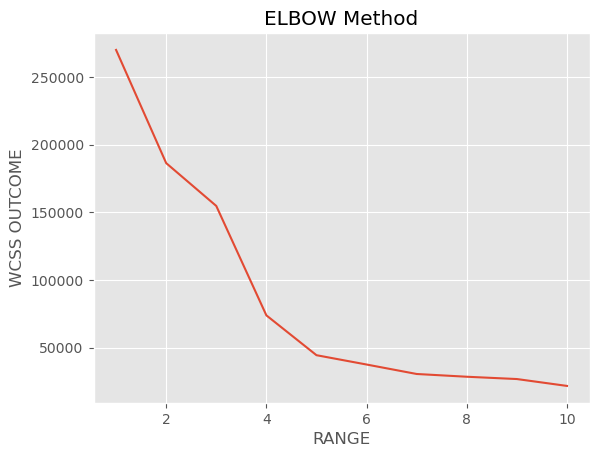

In [12]:
plt.style.use('ggplot')
plt.plot(range(1,11),wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS OUTCOME')
plt.title('ELBOW Method')
plt.show()

In [16]:
km2 = KMeans(n_clusters=5,random_state=1,n_init='auto')
ypred = km2.fit_predict(X)
ypred

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

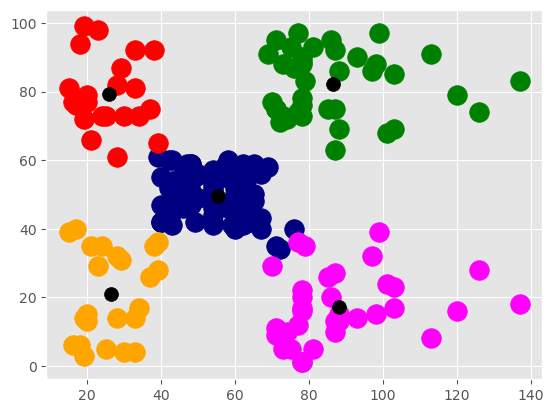

In [17]:
plt.scatter(X[ypred == 0,0], X[ypred == 0,1], c ='navy', s = 200)
plt.scatter(X[ypred == 1,0], X[ypred == 1,1], c ='magenta', s = 200)
plt.scatter(X[ypred == 2,0], X[ypred == 2,1], c ='red', s = 200)
plt.scatter(X[ypred == 3,0], X[ypred == 3,1], c ='green', s = 200)
plt.scatter(X[ypred == 4,0], X[ypred == 4,1], c ='orange', s = 200)
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],c ='black', s=100, label='DATAPOINT')